<a href="https://colab.research.google.com/github/Anubhavrajak/LOAN-PREDICTION-ANALYSIS/blob/main/Big_Smart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [831]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [832]:
train = pd.read_csv("/content/drive/MyDrive/train_Sales.csv")
test = pd.read_csv("/content/drive/MyDrive/test_Sales.csv")

In [833]:
train.columns,test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [834]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [835]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [836]:
train.drop(columns=["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)
test.drop(columns=["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [837]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

In [838]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [839]:
train.Outlet_Size = train.Outlet_Size.fillna('Medium')

In [840]:

test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())
test.Outlet_Size = test.Outlet_Size.fillna('Medium')

In [841]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

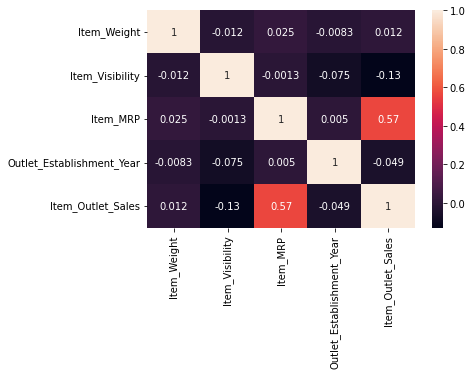

In [842]:
sns.heatmap(train.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


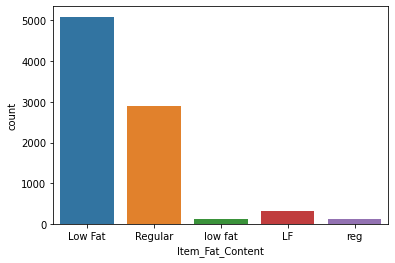

In [843]:
sns.countplot(train.Item_Fat_Content)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


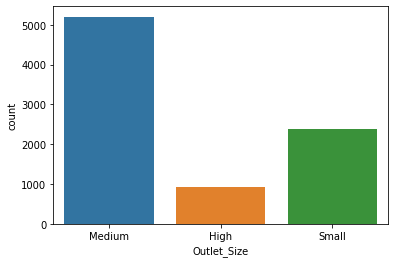

In [844]:
sns.countplot(train.Outlet_Size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

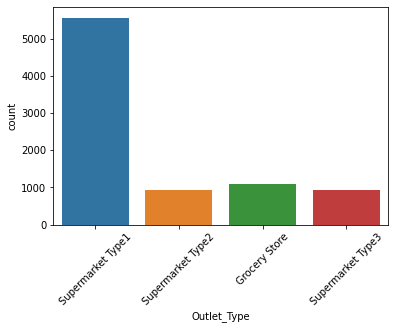

In [845]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=45)


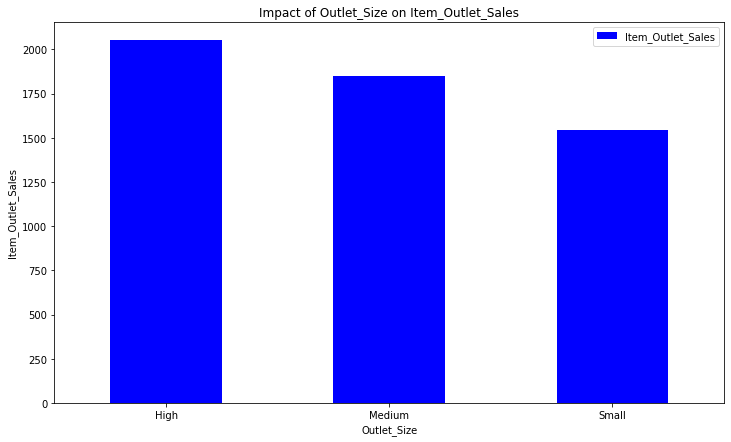

In [846]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

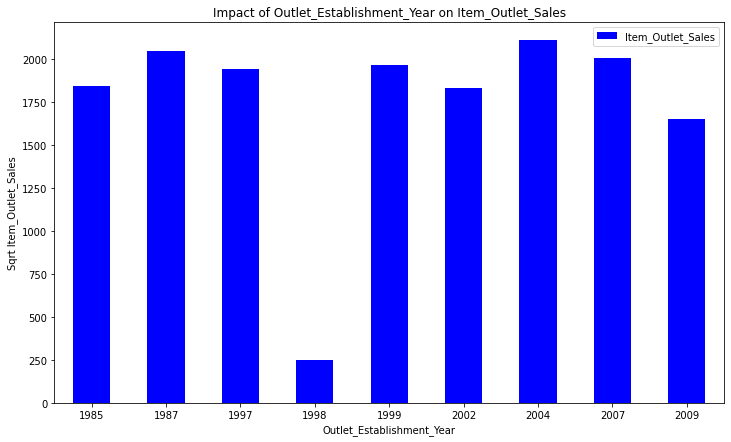

In [847]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


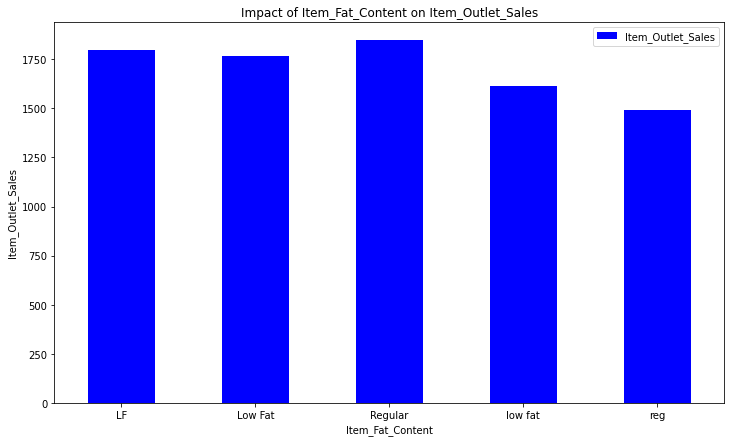

In [848]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [849]:
##Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
#Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

#plt.xlabel("Outlet_Identifier")
#plt.ylabel("Item_Outlet_Sales")
#plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
#plt.xticks(rotation=0)
#plt.show()##

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


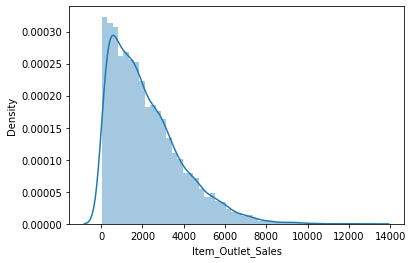

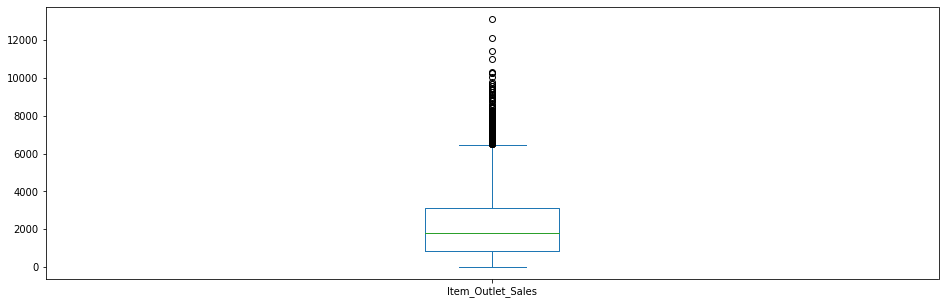

In [850]:
sns.distplot(train['Item_Outlet_Sales']);
plt.show()
train['Item_Outlet_Sales'].plot.box(figsize= (16,5))
plt.show()

In [851]:
## DATA PREPROCESSING

In [852]:
train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [853]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

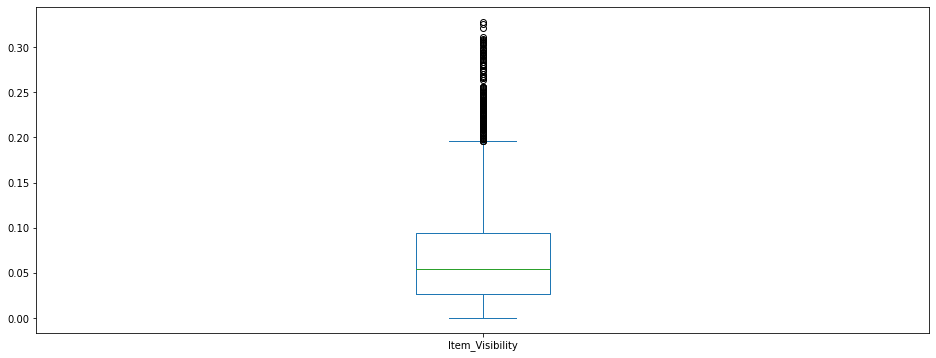

In [854]:
train['Item_Visibility'].plot.box(figsize= (16,6))
plt.show()

Remove Outliers

In [855]:
def remoutl(train,col):
 percentile25 = train[col].quantile(0.25)
 percentile75 = train[col].quantile(0.75)
 print(percentile25,percentile75)
 iqr=percentile75-percentile25
 upper_limit = percentile75 + 1.5 * iqr
 lower_limit = percentile25 - 1.5 * iqr
 
 train[col] = np.where(
 train[col] > upper_limit,
 upper_limit,
 np.where(
 train[col] < lower_limit,
 lower_limit,
 train[col]
 )
 )


In [856]:
remoutl(train,'Item_Visibility')
remoutl(test,'Item_Visibility')

0.0269894775 0.0945852925
0.027046875 0.093462623


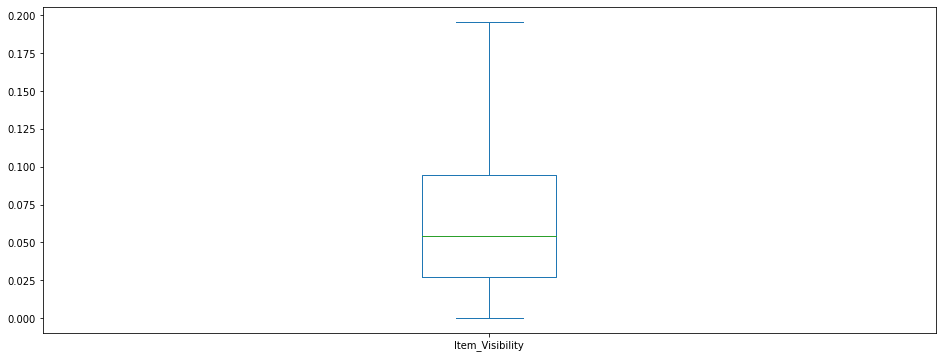

In [857]:
train['Item_Visibility'].plot.box(figsize= (16,6))
plt.show()

In [858]:
print(train["Item_Weight"].skew())
print(train["Item_Visibility"].skew())
print(train["Item_MRP"].skew())


0.09056145191764828
0.813979627580485
0.1272022683110526


In [859]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [860]:

train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [861]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [862]:
test['Item_Fat_Content'] = encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = encoder.fit_transform(test['Item_Type'])
test['Outlet_Size'] = encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = encoder.fit_transform(test['Outlet_Type'])

In [863]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [864]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [865]:
from xgboost import XGBRegressor
from sklearn import metrics

In [866]:
regressor = XGBRegressor()

In [867]:
regressor.fit(X,y)

[18:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [868]:
training_data_prediction = regressor.predict(x_cv)

In [869]:
r2_train = metrics.r2_score(y_cv, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.6431063140693258


In [870]:
from sklearn.linear_model import LinearRegression
lgl = LinearRegression()
lgl.fit(x_train,y_train)
y_pred = lgl.predict(x_cv)
print(metrics.r2_score(y_cv,y_pred))

0.5232781826733341


In [871]:
from sklearn.ensemble import RandomForestRegressor
rdc = RandomForestRegressor()
rdc.fit(x_train,y_train)
y_pred = rdc.predict(x_cv)
print(metrics.r2_score(y_cv,y_pred))

0.5839336263622321


In [872]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_cv)
print(metrics.r2_score(y_cv,y_pred))

0.4552712426729535


In [873]:
test_data_prediction = regressor.predict(test)

In [874]:
print(test_data_prediction)
print(len(test_data_prediction))

[1625.5093 1431.14    560.2953 ... 1849.9231 3734.9436 1248.7118]
5681


In [875]:
submission = pd.read_csv("/content/drive/MyDrive/sample_submission_sales.csv")

In [876]:
submission['Item_Outlet_Sales'] =test_data_prediction

In [877]:
pd.DataFrame(submission, columns= ["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales" ])
submission.to_csv('submission_sales_pred.csv')

In [878]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1625.509277
1,FDW14,OUT017,1431.140015
2,NCN55,OUT010,560.295288
3,FDQ58,OUT017,2541.535645
4,FDY38,OUT027,6069.189453
...,...,...,...
5676,FDB58,OUT046,2085.534912
5677,FDD47,OUT018,2435.649658
5678,NCO17,OUT045,1849.923096
5679,FDJ26,OUT017,3734.943604
